In [1]:
] activate ../../Acceleration

 Activating environment at `~/Desktop/Code/Acceleration/Acceleration/Project.toml`


In [2]:
using Acceleration

n = 1000; # number of samples
d = 2;    # number of features
selected_labels = [3,4];  ## Only two labels allowed

data, labels = load_dataset("FashionMNIST",selected_labels,n,d);  # load data set
λ = 1;    # regularizer consant
f,∇f,∇ϕ_cjg,σ,L,μ  = svm_setup(data,labels,λ); # obtan the ML model functions 

┌ Info: Loading dataset FashionMNIST with 60000 samples and 784 features
└ @ Acceleration /Users/victor/Desktop/Code/Acceleration/Acceleration/src/datasets.jl:26


In [3]:
x_ini = zeros(d+1)
k = 10000;
L = 1000;
μ = 1;

@time x_out1 = mirror_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out2 = gradient_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out3 = accelerated_mirror_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out4 = SCVX_AMD(f,∇f,∇ϕ_cjg,x_ini,σ,L,μ,k);

  0.878360 seconds (8.27 M allocations: 668.953 MiB, 12.09% gc time)
  0.341911 seconds (5.91 M allocations: 550.725 MiB, 20.04% gc time)
  0.334126 seconds (5.95 M allocations: 554.641 MiB, 20.30% gc time)
  0.380252 seconds (6.13 M allocations: 566.678 MiB, 18.14% gc time)


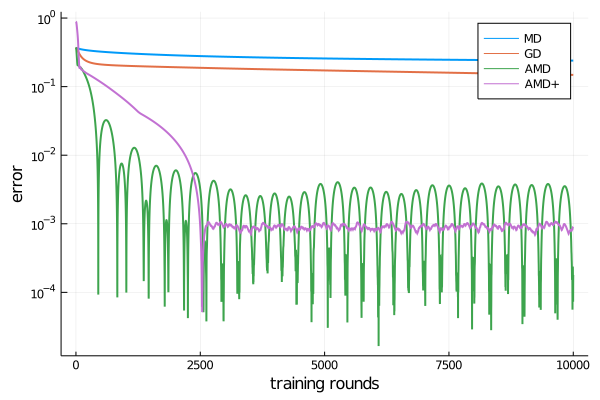

In [5]:
using Plots

x_opt = svm_compute_optval(λ,data,labels)

p1 = sqrt.(sum((x_out1 .- x_opt).^2, dims=1)');
p2 = sqrt.(sum((x_out2 .- x_opt).^2, dims=1)');
p3 = sqrt.(sum((x_out3 .- x_opt).^2, dims=1)');
p4 = sqrt.(sum((x_out4 .- x_opt).^2, dims=1)');

fig = plot(hcat(p1,p2,p3,p4),yaxis=:log, linewidth=2, 
label = ["MD" "GD" "AMD" "AMD+"], xlabel = "training rounds", ylabel = "error")

In [ ]:
savefig(fig,"svm_algorithms.pdf")

In [ ]:
fig = svm_plot(data,labels,x_opt,x_out3)

In [ ]:
error = sum(abs.(sign.(data*x_opt[1:2] .- x_opt[3]) - sign.(labels)))/(2*size(data,1))

In [ ]:
plot(fig, legend=:topleft, label = ["Dress" "Coat" "Opt. classifier" "AMD classifier"])

In [ ]:
savefig("svm_FashionMNIST.pdf")

In [ ]:
using MLDatasets

In [ ]:
FashionMNIST.classnames()


In [ ]:
using Acceleration

n = 1000; # number of samples
d = 2;    # number of features
selected_labels = [3,4];

data, labels = load_dataset("FashionMNIST",selected_labels,n,d);  # load data set
svm = svm_setup(data,labels,1); # obtain the ML model functions 

x_ini = zeros(d+1) # set initial point
k = 10000; # set maximum number of iterations
accelerated_mirror_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
